<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-35/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 4 - Actividad 1**
Maestría en Inteligencia Artificial Aplicada

**Curso:** Ciencia y analítica de datos

Tecnológico de Monterrey


**Profesor Titular:**
- Jobish Vallikavungal Devassia

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de los estudiantes:**
- Alejandra Mendoza Flores - A01793032
- Fernando Sebastian Sanchez Cardona - A01687530

**Fecha:** 

11 de octubre del 2022

#**Parte 1: Ejercicio guiado**

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

- Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.
Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

- Paso 2: Interprete cada componente principal en términos de las variables originales
Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

- Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  - X6 = the repayment status in September,2005; 
  - X7 = the repayment status in August, 2005; 
  . . .
  - X11 = the repayment status in April, 2005. 
  
  The measurement scale for the repayment status is: 
  - -1 = pay duly 
  - 1 = payment delay for one month
  - 2 = payment delay for two months
  . . .
  - 8 = payment delay for eight months
  - 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar).
  - X12 = amount of bill statement in September, 2005; 
  - X13 = amount of bill statement in August, 2005; . . .; 
  - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
  - X18 = amount paid in September, 2005
  - X19 = amount paid in August, 2005
  . . .
  - X23 = amount paid in April, 2005. 

In [59]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [60]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Arreglar datos**

In [61]:
column_names = {
    'ID': 'id',
    'X1': 'credit',
    'X2': 'gender',
    'X3': 'education',    
    'X4': 'marital_status',
    'X5': 'age', 
    'X6': 'payment_2005_09', 
    'X7': 'payment_2005_08', 
    'X8': 'payment_2005_07', 
    'X9': 'payment_2005_06', 
    'X10': 'payment_2005_05', 
    'X11': 'payment_2005_04', 
    'X12': 'bill_2005_09', 
    'X13': 'bill_2005_08', 
    'X14': 'bill_2005_07', 
    'X15': 'bill_2005_06', 
    'X16': 'bill_2005_05', 
    'X17': 'bill_2005_04', 
    'X18': 'pay_amt_2005_09', 
    'X19': 'pay_amt_2005_08', 
    'X20': 'pay_amt_2005_07', 
    'X21': 'pay_amt_2005_06', 
    'X22': 'pay_amt_2005_05', 
    'X23': 'pay_amt_2005_04', 
    'Y': 'default'
              }
df.rename(columns= column_names, inplace=True)

In [62]:
df.head()

,id,credit,gender,education,marital_status,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [63]:
df['age'].fillna(df['age'].mean(),inplace=True)

df['payment_2005_09'] = df['payment_2005_09'].replace(-2, -1)
df['payment_2005_08'] = df['payment_2005_08'].replace(-2, -1)
df['payment_2005_07'] = df['payment_2005_07'].replace(-2, -1)
df['payment_2005_06'] = df['payment_2005_06'].replace(-2, -1)
df['payment_2005_05'] = df['payment_2005_05'].replace(-2, -1)
df['payment_2005_04'] = df['payment_2005_04'].replace(-2, -1)

df['payment_2005_09'].fillna(0, inplace=True)
df['payment_2005_08'].fillna(0, inplace=True)
df['payment_2005_07'].fillna(0, inplace=True)
df['payment_2005_06'].fillna(0, inplace=True)
df['payment_2005_05'].fillna(0, inplace=True)
df['payment_2005_04'].fillna(0, inplace=True)

df['bill_2005_09'].fillna(0, inplace=True)
df['bill_2005_08'].fillna(0, inplace=True)
df['bill_2005_07'].fillna(0, inplace=True)
df['bill_2005_06'].fillna(0, inplace=True)
df['bill_2005_05'].fillna(0, inplace=True)
df['bill_2005_04'].fillna(0, inplace=True)

df['pay_amt_2005_09'].fillna(0, inplace=True)
df['pay_amt_2005_08'].fillna(0, inplace=True)
df['pay_amt_2005_07'].fillna(0, inplace=True)
df['pay_amt_2005_06'].fillna(0, inplace=True)
df['pay_amt_2005_05'].fillna(0, inplace=True)
df['pay_amt_2005_04'].fillna(0, inplace=True)

df = df[df['default']. notna()]

In [64]:
ndf=df.drop(columns=['gender', 'education', 'marital_status'])
ndf.head()

,id,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
0,1,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [65]:
ndf.isna().values.any()

False

In [66]:
df_credit_age = ndf[['credit','age']]
df_credit_age.corr()

,credit,age
credit,1.000000,0.144714
age,0.144714,1.000000


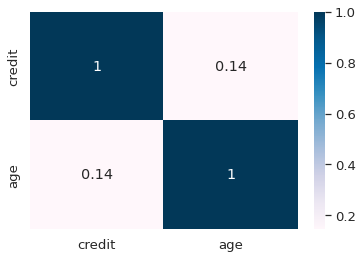

In [67]:
sns.heatmap(df_credit_age.corr(), annot=True, cmap='PuBu')

In [68]:
df_credit_pay_amt = ndf[['credit','pay_amt_2005_09']]
df_credit_pay_amt.corr()

,credit,pay_amt_2005_09
credit,1.000000,0.195257
pay_amt_2005_09,0.195257,1.000000


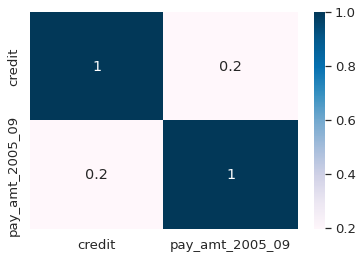

In [69]:
sns.heatmap(df_credit_pay_amt.corr(), annot=True, cmap='PuBu')

In [70]:
df_credit_bill = ndf[['credit', 'bill_2005_09']]
df_credit_bill.corr()

,credit,bill_2005_09
credit,1.000000,0.285453
bill_2005_09,0.285453,1.000000


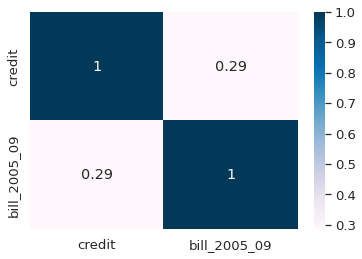

In [71]:
sns.heatmap(df_credit_bill.corr(), annot=True, cmap='PuBu')

In [72]:
ndf.credit.mean().round(2)

167496.07

In [73]:
ndf.bill_2005_09.mean().round(2)

51221.82

Matriz de covarianza

In [74]:
varianza = np.cov([ndf.credit, ndf.bill_2005_09])
varianza

array([[1.68347521e+10, 2.72744844e+09],
       [2.72744844e+09, 5.42295604e+09]])

In [75]:
credit_bill_df = ndf [['credit', 'bill_2005_09']]
credit_bill_df.var().sum()

22257708146.414627

In [76]:
varianzaTotal = credit_bill_df.var().sum()
varianzaCredit = varianza[0][0]
varianzaBill = varianza[1][1]

In [77]:
print('Varianza Total:', varianzaTotal.round(2))
print('Varianza de Credito:', ((varianzaCredit/varianzaTotal)*100).round(2), '%')
print('Varianza de Cuentas:', ((varianzaBill/varianzaTotal)*100).round(2), '%')

Varianza Total: 22257708146.41
Varianza de Credito: 75.64 %
Varianza de Cuentas: 24.36 %


In [78]:
credit_bill_df.corr().round(2)

,credit,bill_2005_09
credit,1.00,0.29
bill_2005_09,0.29,1.00


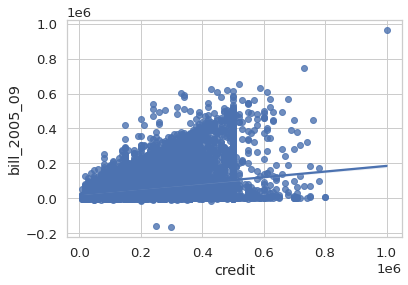

In [79]:
plot = sns.regplot(data=df, x=df.credit, y=df.bill_2005_09)
plot

In [80]:
pcs = PCA(n_components=2)
pcs.fit(ndf[['credit', 'bill_2005_09']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,132110.229399,0.784138,0.784138
1,69315.189062,0.215862,1.000000


In [81]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,132110.23,69315.19
Proportion of variance,0.78,0.22
Cumulative proportion,0.78,1.00


In [82]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,132110.2294,69315.1891
Proportion of variance,0.7841,0.2159
Cumulative proportion,0.7841,1.0000


**Scree Plot**

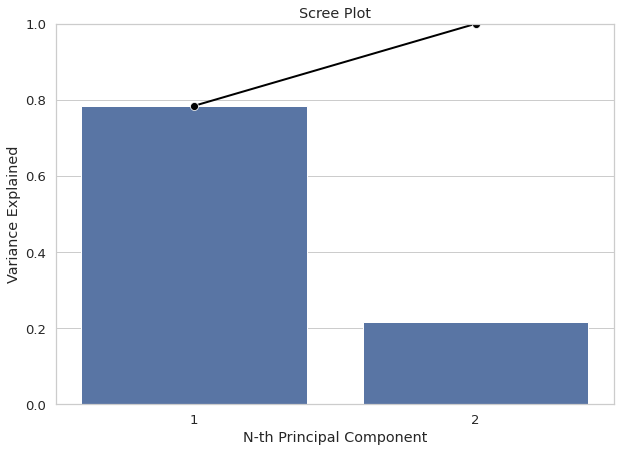

In [83]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, y = pcs.explained_variance_ratio_, color = 'b')

_ = sns.lineplot(x = PC_components-1, y = np.cumsum(pcs.explained_variance_ratio_), color = 'black', linestyle = '-', linewidth = 2, marker = 'o', markersize = 8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [84]:
pcs.components_.round(4)

array([[ 0.9752,  0.2211],
       [-0.2211,  0.9752]])

In [85]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['credit', 'bill_2005_09']
                                )
pcsComponents_df

,PC1,PC2
credit,0.975250,-0.221106
bill_2005_09,0.221106,0.975250


In [86]:
score = pd.DataFrame(pcs.transform(
    ndf[['credit','bill_2005_09']]
),
  columns=['x','y']
)
score.head()

,x,y
0,-154305.779942,-13525.602463
1,-57052.990191,-36836.763881
2,-80438.561921,-4303.868469
3,-115523.692802,21852.040845
4,-124008.204475,-15571.216505


In [87]:
score.x.mean()

-1.291563126446108e-11

In [88]:
score.y.sum()

5.029141902923584e-08

In [89]:
score.x.var() + score.y.var()

22257708146.414627

In [90]:
ndf.credit.var() + ndf.bill_2005_09.var()

22257708146.414627

In [91]:
((score.x.var()/
  (score.x.var()+score.y.var())
 )*100).round(0)

78.0

In [92]:
ndf.shape

(29997, 22)

In [93]:
pcs = PCA()
pcs.fit(ndf.iloc[:, 1: ].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Standard deviation,166528.318369,115828.896414,37237.666242,27731.711992,20687.556674,20267.092161,18512.450782,17030.991936,16283.934212,11609.474150,...,8782.487051,8198.650883,9.116664e+00,1.748038e+00,8.469928e-01,6.563607e-01,5.444254e-01,4.809765e-01,3.945567e-01,3.808942e-01
Proportion of variance,0.610455,0.295333,0.030524,0.016929,0.009421,0.009042,0.007544,0.006385,0.005837,0.002967,...,0.001698,0.001480,1.829572e-09,6.726351e-11,1.579200e-11,9.483375e-12,6.524609e-12,5.092435e-12,3.426863e-12,3.193644e-12
Cumulative proportion,0.610455,0.905788,0.936312,0.953241,0.962662,0.971704,0.979248,0.985633,0.991470,0.994437,...,0.998520,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


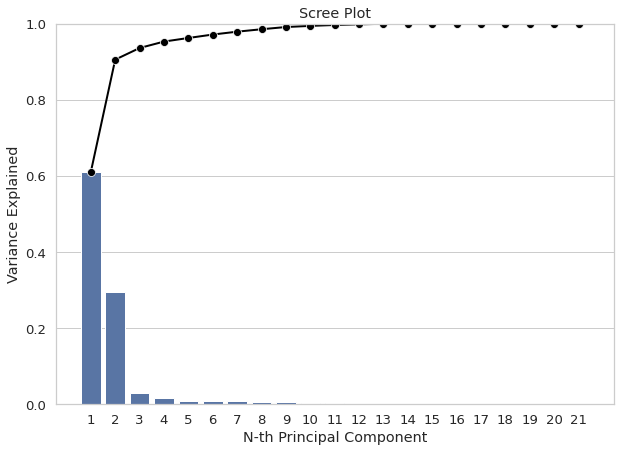

In [94]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


In [95]:
((pcsSummary_df.iloc[2][3])*100).round(1)

95.3

In [96]:
((pcsSummary_df.iloc[2][1])*100).round(2)

90.58

In [97]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,166528.3184,0.6105,0.6105
PC2,115828.8964,0.2953,0.9058
PC3,37237.6662,0.0305,0.9363
PC4,27731.7120,0.0169,0.9532
PC5,20687.5567,0.0094,0.9627
PC6,20267.0922,0.0090,0.9717
PC7,18512.4508,0.0075,0.9792
PC8,17030.9919,0.0064,0.9856
PC9,16283.9342,0.0058,0.9915
PC10,11609.4742,0.0030,0.9944


In [98]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:5].round(4).sort_values(by='PC1',ascending=False)

,PC1,PC2,PC3,PC4,PC5
credit,0.4915,0.8691,-0.0206,-0.0184,-0.0441
bill_2005_09,0.3885,-0.2213,-0.5490,-0.2050,0.3169
bill_2005_08,0.3814,-0.2264,-0.3909,-0.0376,0.0115
bill_2005_07,0.3722,-0.2165,-0.0481,0.5535,-0.2480
bill_2005_06,0.3464,-0.1940,0.2610,0.0791,-0.3672
bill_2005_05,0.3229,-0.1768,0.4281,-0.2001,-0.0157
bill_2005_04,0.3086,-0.1674,0.4837,-0.3084,0.2264
pay_amt_2005_08,0.0313,0.0108,0.1600,0.6732,0.3372
pay_amt_2005_07,0.0268,0.0110,0.1351,0.0283,0.3113
pay_amt_2005_09,0.0266,0.0057,0.0375,0.1936,0.2028


In [99]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_dfX.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
credit,0.4915,0.8691,-0.0206,-0.0184,-0.0441,0.0169,-0.0011,0.0010,0.0095,0.0038,...,0.0000,0.0019,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
age,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,...,-0.0000,-0.0000,1.0000,0.0018,0.0013,0.0003,0.0006,0.0001,-0.0001,0.0016
payment_2005_09,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,...,0.0000,-0.0000,0.0002,0.3585,-0.6033,-0.5861,-0.3288,0.1822,-0.0142,0.1500
payment_2005_08,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,...,0.0000,0.0000,-0.0006,0.4276,-0.4413,0.2381,0.5885,-0.4580,0.0976,-0.0113
payment_2005_07,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,...,-0.0000,0.0000,-0.0010,0.4442,-0.0730,0.6234,-0.1381,0.5854,-0.2117,0.0468
payment_2005_06,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,...,0.0000,0.0000,-0.0006,0.4347,0.2792,0.1419,-0.5523,-0.3905,0.5030,-0.0500
payment_2005_05,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,...,-0.0000,-0.0000,-0.0013,0.4004,0.4023,-0.2191,-0.0056,-0.2931,-0.7332,0.0793
payment_2005_04,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,-0.0014,0.3699,0.4352,-0.3699,0.4683,0.4168,0.3787,-0.0228
bill_2005_09,0.3885,-0.2213,-0.5490,-0.2050,0.3169,0.0032,-0.4563,0.0070,0.0703,0.1725,...,-0.2048,-0.0062,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
bill_2005_08,0.3814,-0.2264,-0.3909,-0.0376,0.0115,-0.0808,0.5269,-0.0657,0.0994,0.0081,...,0.4767,0.0167,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000


In [100]:
from sklearn import preprocessing

In [101]:
ndf.iloc[:, 1:].head()

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
0,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [102]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf.iloc[:, 1:].dropna(axis=0))) 

PCA()

In [103]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.5116,0.3004,0.3004
PC2,2.0503,0.2002,0.5005
PC3,1.2213,0.0710,0.5716
PC4,1.0192,0.0495,0.6210
PC5,0.9741,0.0452,0.6662
PC6,0.9503,0.0430,0.7092
PC7,0.9380,0.0419,0.7511
PC8,0.9354,0.0417,0.7928
PC9,0.8868,0.0374,0.8302
PC10,0.8575,0.0350,0.8652


In [104]:
pcsSummary_df.iloc[2,13]

0.961477939057905

In [105]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
credit,0.088718,0.287468,0.064557,-0.232643,-0.017359,-0.137001,-0.076593
age,0.018366,0.055024,-0.018681,-0.824182,0.466299,-0.109405,-0.137181
payment_2005_09,0.140253,-0.312249,0.024234,-0.164428,-0.227610,0.131282,0.125574
payment_2005_08,0.164224,-0.343538,0.048032,-0.087911,-0.159570,0.009837,0.004546
payment_2005_07,0.166953,-0.351991,0.099887,-0.013479,-0.012139,-0.086151,-0.056707
payment_2005_06,0.172585,-0.355691,0.135443,0.039612,0.122554,-0.170355,-0.079535
payment_2005_05,0.177216,-0.343864,0.151915,0.076142,0.198635,-0.147243,-0.094020
payment_2005_04,0.172998,-0.318817,0.144606,0.093881,0.211933,-0.057220,-0.180786
bill_2005_09,0.347572,0.113290,-0.220562,-0.002683,-0.054883,-0.023344,0.021614
bill_2005_08,0.359096,0.112810,-0.190054,0.022279,0.001825,-0.014582,0.077037


In [106]:
pcsComponents_df.PC1.idxmax()

'bill_2005_06'

In [107]:
pcsComponents_df.PC1.nlargest(3)

bill_2005_06    0.367696
bill_2005_05    0.365691
bill_2005_07    0.363437
Name: PC1, dtype: float64

In [108]:
pcsComponents_df.PC2.idxmin()

'payment_2005_06'

In [109]:
pcsComponents_df.PC2.nsmallest(3)

payment_2005_06   -0.355691
payment_2005_07   -0.351991
payment_2005_05   -0.343864
Name: PC2, dtype: float64

##Paso 1: Determine el numero minimo de componentes principales que representan la mayor parte de la variacion en sus datos

  Utilice la proporcion acumulada de la varianza que explica los componentes para determinar la cantidad de varianza que explican los componentes principales.

 - Para el modelo sin datos escalados con 4 componentes se explica el  de la varianza

In [110]:
(pcsSummary_df.iloc[2, 3] * 100).round(2)

62.1

 - Para el modelo escalado con 13 componentes se explica el de la varianza
 

In [111]:
(pcsComponents_df.iloc[2,12] * 100).round(2)

-62.27

#**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

- ¿Cuál es el número de componentes mínimo y por qué?
- ¿Cuál es la variación de los datos que representan esos componentes?
- ¿Cuál es la pérdida de información después de realizar PCA?
- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
